# Email Spam Classifier

In [299]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import string 
%matplotlib inline
import collections
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import classification_report
from sklearn import feature_extraction
from sklearn.metrics import roc_auc_score
from nltk.corpus import stopwords
import nltk
import warnings
warnings.filterwarnings('ignore')

In [300]:
os.listdir('/Users/KBrig/ML-Pipeline')

['.git',
 '.gitignore',
 '.ipynb_checkpoints',
 'ML-Pipeline',
 'ML-Pipeline.ipynb',
 'README.md',
 'Spam.csv']

# Part1: Data Reading and Exploration

In [301]:
path='/Users/KBrig/ML-Pipeline/spam.csv'
#EmData= pd.read_csv('Spam.csv',encoding='cp1252')
EmData= pd.read_csv(path,encoding='cp1252',dtype={'type':np.str, 'Email_body':np.str})

In [302]:
EmData.head()

,type,Email_body,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [303]:
EmData=EmData[['type','Email_body']]

In [304]:
#print(EmData.shape)
for col in EmData.columns:
    print ('column', col,':', type(col[0]))

column type : <class 'str'>
column Email_body : <class 'str'>


In [305]:
EmData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
type          5572 non-null object
Email_body    5572 non-null object
dtypes: object(2)
memory usage: 87.1+ KB


In [306]:
EmData.groupby('type').describe()

Email_body                                                               
          count unique                                                top freq
type                                                                          
ham        4825   4516                             Sorry, I'll call later   30
spam        747    653  Please call our customer service representativ...    4

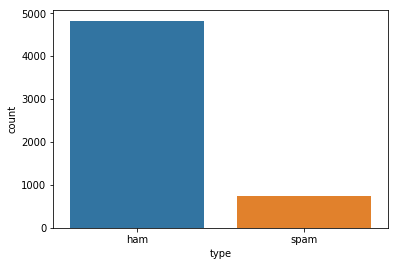

In [307]:
sns.countplot(x='type',data=EmData)

In [308]:
#EmData['y']=EmData['type'].apply(lambda x: x =='spam').astype(int)
EmData['type_num']= EmData.type.map({'ham':0, 'spam':1})

In [309]:
EmData.head()

,type,Email_body,type_num
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0






# Part2: Data Splitting


In [310]:
X = EmData.Email_body
y= EmData.type_num
print(X.shape)
print(y.shape)

(5572,)
(5572,)


In [311]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=1)


In [312]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3900,)
(1672,)
(3900,)
(1672,)





# Part3: Feature Engineering

Feature Extraction with default values of "CountVectorizer" and "English" stop words

In [327]:
from sklearn.feature_extraction.text import TfidfVectorizer
def pip(classifier):
    #SW = set(stopwords.words('english'))
    pipeline = Pipeline([
        ('vect', CountVectorizer()),  # strings to token integer counts
        ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
        ('clf', classifier),
    ])
    return(pipeline)
        

In [ ]:
#from sklearn.feature_extraction.text import TfidfVectorizer
#tfidf = TfidfVectorizer(min_df=2, max_df=0.5, ngram_range=(2, 3))
#features = tfidf.fit_transform(X_train)
#pd.DataFrame(
 #   features.todense(),
  #  columns=tfidf.get_feature_names())
#tfidf.get_feature_names()




# Part4: Model Building



# Naieve Bayes Classifier 

In [328]:
from sklearn.naive_bayes import MultinomialNB
pip_NB= pip(MultinomialNB(fit_prior=False))

In [329]:
pip_NB.fit(X_train,y_train)

Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip...near_tf=False, use_idf=True)), ('clf', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=False))])

In [330]:
predictions_NB = pip_NB.predict(X_test)

In [331]:
print(classification_report(predictions_NB,y_test))

             precision    recall  f1-score   support

          0       0.99      0.98      0.99      1471
          1       0.87      0.94      0.90       201

avg / total       0.98      0.98      0.98      1672



In [332]:
NB_roc_auc_score=roc_auc_score(y_test,predictions_NB)
NB_roc_auc_score

0.9293596910768144

# Logistic Regression Classifier

In [333]:
from sklearn.linear_model import LogisticRegression
pip_LR= pip(LogisticRegression(random_state=0))

In [334]:
pip_LR.fit(X_train,y_train)

Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip...nalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [335]:
predictions_LR = pip_LR.predict(X_test)

In [336]:
print(classification_report(predictions_LR,y_test))

             precision    recall  f1-score   support

          0       1.00      0.97      0.98      1497
          1       0.79      0.99      0.88       175

avg / total       0.98      0.97      0.97      1672



In [337]:
LR_roc_auc_score=roc_auc_score(y_test,predictions_LR)
LR_roc_auc_score

0.8961012329164721




# SVM Classifier

In [338]:
from sklearn.linear_model import SGDClassifier
pip_SVM= pip(SGDClassifier(random_state=0))

In [339]:
pip_SVM.fit(X_train,y_train)

Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip...lty='l2', power_t=0.5, random_state=0, shuffle=True,
       tol=None, verbose=0, warm_start=False))])

In [340]:
predictions_SVM = pip_SVM.predict(X_test)

In [341]:
print(classification_report(predictions_SVM,y_test))

             precision    recall  f1-score   support

          0       1.00      0.99      0.99      1470
          1       0.91      0.99      0.95       202

avg / total       0.99      0.99      0.99      1672



In [342]:
SVM_roc_auc_score=roc_auc_score(y_test,predictions_SVM)
SVM_roc_auc_score

0.9553903814847999




# Decision Trees Classifier 

In [343]:
from sklearn import tree
pip_DT=pip(tree.DecisionTreeClassifier())

In [344]:
pip_DT.fit(X_train,y_train)

Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip...      min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'))])

In [345]:
predictions_DT = pip_DT.predict(X_test)

In [346]:
print(classification_report(predictions_DT,y_test))

             precision    recall  f1-score   support

          0       0.98      0.98      0.98      1458
          1       0.86      0.88      0.87       214

avg / total       0.97      0.97      0.97      1672



In [347]:
DT_roc_auc_score=roc_auc_score(y_test,predictions_DT)
DT_roc_auc_score

0.9222518077306514



# Ensamble Methods Classifier

In [348]:
from sklearn.ensemble import RandomForestClassifier
pip_EM = pip(RandomForestClassifier(n_estimators=10))

In [349]:
pip_EM.fit(X_train,y_train)

Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip...n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))])

In [350]:
predictions_EM = pip_EM.predict(X_test)

In [351]:
print(classification_report(predictions_EM,y_test))

             precision    recall  f1-score   support

          0       1.00      0.96      0.98      1507
          1       0.76      1.00      0.86       165

avg / total       0.98      0.97      0.97      1672



In [352]:
EM_roc_auc_score=roc_auc_score(y_test,predictions_EM)
EM_roc_auc_score

0.8784403669724771



# Comparing the accuracy of different ML models 

In [353]:
accuracy=[NB_roc_auc_score,LR_roc_auc_score,SVM_roc_auc_score,DT_roc_auc_score,EM_roc_auc_score]
accuracy

[0.9293596910768144,
 0.8961012329164721,
 0.9553903814847999,
 0.9222518077306514,
 0.8784403669724771]

In [354]:
models= ["NB", "LR", "SVM", "DT", "EM"]
models


['NB', 'LR', 'SVM', 'DT', 'EM']

In [355]:
d = {'model': models,'accuracy': accuracy}

In [356]:
Performane = pd.DataFrame(data=d)
Performane

,model,accuracy
0,NB,0.929360
1,LR,0.896101
2,SVM,0.955390
3,DT,0.922252
4,EM,0.878440


Text(0.5,1,'Comparing the Accuracy of Different ML Models')

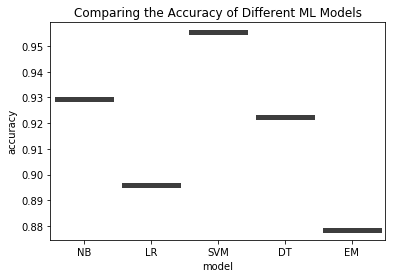

In [357]:
ax=sns.boxplot(x='model', y='accuracy', data=Performane,linewidth=5)
ax.set_title("Comparing the Accuracy of Different ML Models")




# Model Tuning with Cross Validation

In [234]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(pip_SVM, X_train, y_train, scoring='accuracy', cv=5)


In [235]:
model_pip= [MultinomialNB(), LogisticRegression(random_state=0), SGDClassifier(random_state=0), tree.DecisionTreeClassifier(), RandomForestClassifier(n_estimators=10)]

In [236]:
scores.mean()

0.9835900609422097

In [244]:
Acc_with_CV=[]
for l in model_pip:
    Acc_with_CV.append (cross_val_score(pip(l), X_train, y_train, scoring='roc_auc', cv=5).mean())
print(Acc_with_CV)
  

[0.987962898088087, 0.9908732567098839, 0.991940947866372, 0.8899256605017761, 0.984305125204067]


In [245]:
Performane['Accuracy_with_CV']=Acc_with_CV

In [246]:
Performane.head()

,model,accuracy,Accuracy_with_CV
0,NB,0.950005,0.987963
1,LR,0.879702,0.990873
2,SVM,0.944266,0.991941
3,DT,0.907572,0.889926
4,EM,0.905276,0.984305


In [ ]:
##STEMMING

#from nltk.stem.snowball import SnowballStemmer
#stemmer = SnowballStemmer("english", ignore_stopwords=True)

#class StemmedCountVectorizer(CountVectorizer):
#    def build_analyzer(self):
#        analyzer = super(StemmedCountVectorizer, self).build_analyzer()
#        return lambda doc: ([stemmer.stem(w) for w in analyzer(doc)])

#stemmed_count_vect = StemmedCountVectorizer(stop_words='english')

#text_mnb_stemmed = Pipeline([('vect', stemmed_count_vect),
#                            ('tfidf', TfidfTransformer()),
 #                            ('mnb', MultinomialNB()),
  #                          ])

#text_mnb_stemmed = text_mnb_stemmed.fit(X_train, y_train)

#predicted_mnb_stemmed = text_mnb_stemmed.predict(X_test)

#np.mean(predicted_mnb_stemmed == y_test)




# Parameters Tuning with GridSearchCV

Comparing differnt parameters, e.g. comparing the performance of NB with unigram and Bigram 

In [383]:
from sklearn.model_selection import GridSearchCV

In [384]:
 parameters_NB = {'vect__ngram_range': [(1, 2), (2, 3)],
               'tfidf__use_idf': (True, False),
               'clf__alpha': (1e-2, 1e-3),
              }

In [385]:
gs_clf_NB = GridSearchCV(pip(MultinomialNB(fit_prior=False)), parameters, n_jobs=-1)

In [386]:
gs_clf_NB = gs_clf_NB.fit(X_train, y_train)

In [387]:
gs_clf_NB.best_score_


0.9828205128205129

In [388]:
gs_clf_NB.best_params_

{'clf__alpha': 0.01, 'tfidf__use_idf': False, 'vect__ngram_range': (1, 2)}